In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Данные константы
k = 0.011
c = 1.6
alpha = 0.5
l = 0.5 # длина цилиндра
radius = 4 # радиус
beta = 0.008
t = 180 # время наблюдения

In [3]:
# Задаем число отсчетов и шаги
num_m = 1000
num_i = 1000
tau = t/num_m # шаг по времени
h = radius/num_i # шаг по координате r
r_arr = np.linspace(0,l,num_i)
time_arr = np.linspace(0,t,num_m)
w = np.zeros((num_i, num_m))

In [4]:
import scipy.optimize
def bessel(x):
    return scipy.special.jv(0,x)
res = scipy.optimize.root(bessel, 2.3) # нахождение нуля функции в окрестности точки x = 2.3
mu1 = float(res.get('x'))  # первый нуль функции бесселя нулевого порядка

In [5]:
res

    fjac: array([[-1.]])
     fun: array([6.73229492e-14])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-8.24997488e-09])
       r: array([0.51915174])
  status: 1
 success: True
       x: array([2.40482556])

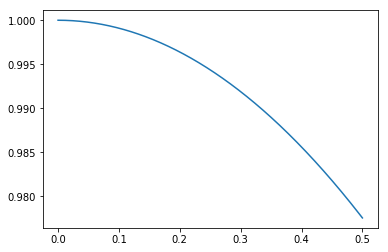

In [6]:
plt.plot(r_arr,bessel(mu1*r_arr/radius)) #нарисуем интенсивность
plt.show()

In [7]:
k1 = k*(mu1/radius)**2 + 2*alpha/l # вспомогательная функция, вылезшая в процесее решения
k1

2.0039759403495254

In [8]:
for i in range(num_i):
    for m in range(num_m):
        time = m*tau
        r_coordinate = i*h
        w[i,m] = beta/k1*(1-np.exp(-k1/c*time))*scipy.special.jv(0,mu1*r_coordinate/radius)

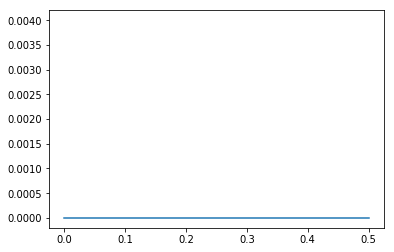

In [9]:
plt.plot(r_arr,w[:,0]) # распредление по радиусу в начальный момент времени
plt.ylim((-0.0002, 0.0042))
plt.show()

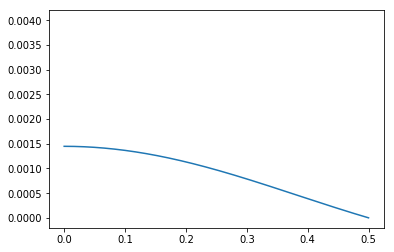

In [10]:
plt.plot(r_arr,w[:,2]) # распредление по радиусу во время второго отсчета по времени
plt.ylim((-0.0002, 0.0042))
plt.show()

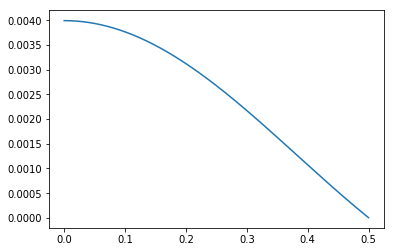

In [11]:
plt.plot(r_arr,w[:,100]) # распредление по радиусу во время 100 отсчета по времени (уже стационарное состояние)
plt.ylim((-0.0002, 0.0042))
plt.show()

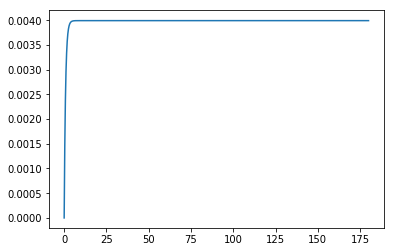

In [12]:
plt.plot(time_arr,w[0,:]) # распредление по времени во точке r = 0
plt.ylim((-0.0002, 0.0042))
plt.show()

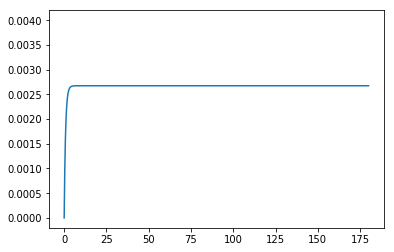

In [13]:
plt.plot(time_arr,w[500,:]) # распредление по времени во точке r = R/2
plt.ylim((-0.0002, 0.0042))
plt.show()

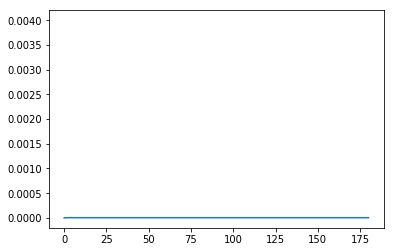

In [14]:
plt.plot(time_arr,w[-1,:]) # распредление по времени во точке r = R
plt.ylim((-0.0002, 0.0042))
plt.show()

In [15]:
w[-1,10]

4.4631986150964835e-06

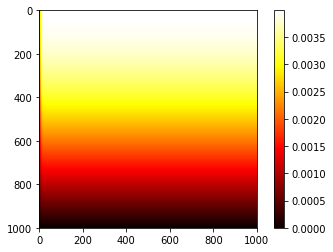

In [16]:
import matplotlib.cm as cmap
plt.imshow(w, cmap=cmap.hot)
plt.colorbar()
plt.show()